Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Message: 'Congratulations! You've won a free ticket to Bahamas. Call now!' is classified as: Spam


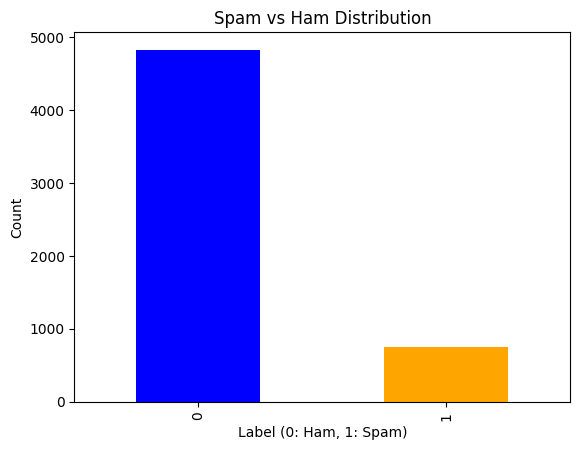

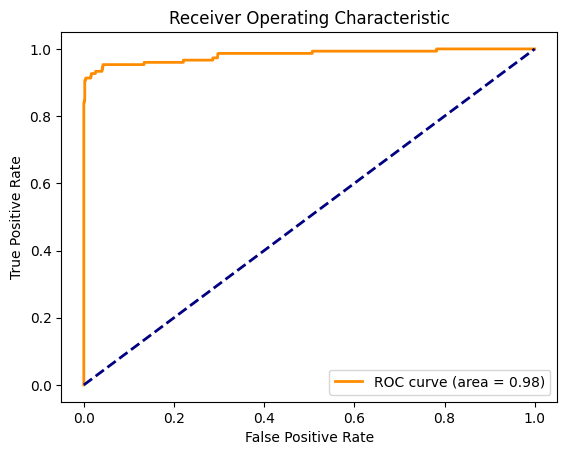

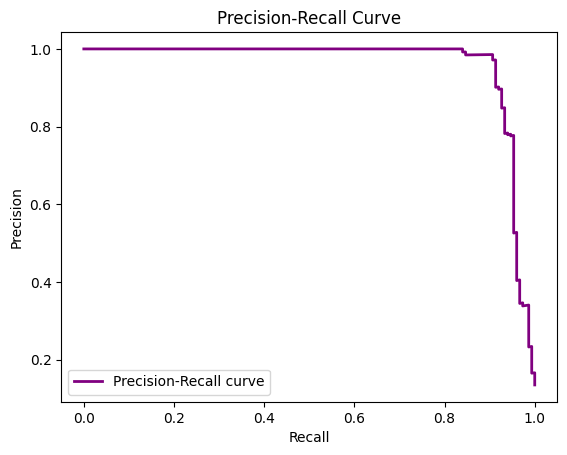

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# データの読み込み
file_path = 'spam.csv'
data = pd.read_csv(file_path, encoding='latin-1')

# 必要な列の選択（スパム判定用）
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

# ラベルを数値に変換（spam: 1, ham: 0）
data['label'] = data['label'].map({'spam': 1, 'ham': 0})

# メッセージとラベルを分割
X = data['message']
y = data['label']

# データの分割（訓練データとテストデータ）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# テキストをベクトル化
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# ロジスティック回帰モデルの訓練
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized, y_train)

# テストデータで予測
predictions = model.predict(X_test_vectorized)
probs = model.predict_proba(X_test_vectorized)[:, 1]

# 精度の評価
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, predictions))

# 新しいメールの判定
def predict_spam(new_message):
    new_message_vectorized = vectorizer.transform([new_message])
    prediction = model.predict(new_message_vectorized)
    return 'Spam' if prediction[0] == 1 else 'Ham'

# 判定例
example_message = "Congratulations! You've won a free ticket to Bahamas. Call now!"
print(f"Message: '{example_message}' is classified as: {predict_spam(example_message)}")

# プロット: スパムとハムの分布
data['label'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Spam vs Ham Distribution')
plt.xlabel('Label (0: Ham, 1: Spam)')
plt.ylabel('Count')
plt.show()

# ROC曲線のプロット
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 適合率-再現率曲線のプロット
precision, recall, _ = precision_recall_curve(y_test, probs)

plt.figure()
plt.plot(recall, precision, color='purple', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()
